In [7]:
# showing what happens when you use a higher norm (outliers are weighted more, small deviations are neglected)
def compute_norm(v, k):
    print(sum((x**k for x in v))**(1/k))
vals = [5, 5, 5, 5, 5, 1000000] # difference between predicted label and actual label (nothing to do with features)
for k in range(1, 10):
    compute_norm(vals, k)

1000025.0
1000000.0000625
999999.9999999994
1000000.0
1000000.0000000008
999999.9999999992
999999.9999999992
1000000.0
999999.9999999992


In [8]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path) #interesting that a context manager is not used
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [12]:
# how to do EDA?
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing['longitude'].notnull().sum()

20640

In [15]:
housing['total_bedrooms'].isnull().sum()
# should we remove this column? should we fill it with 0s? should we fill it with average val?

207

In [16]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing['ocean_proximity'].nunique()

5

In [18]:
len(housing['ocean_proximity'].value_counts())

5

In [19]:
filt = housing['ocean_proximity'] == "ISLAND"
housing.loc[filt]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


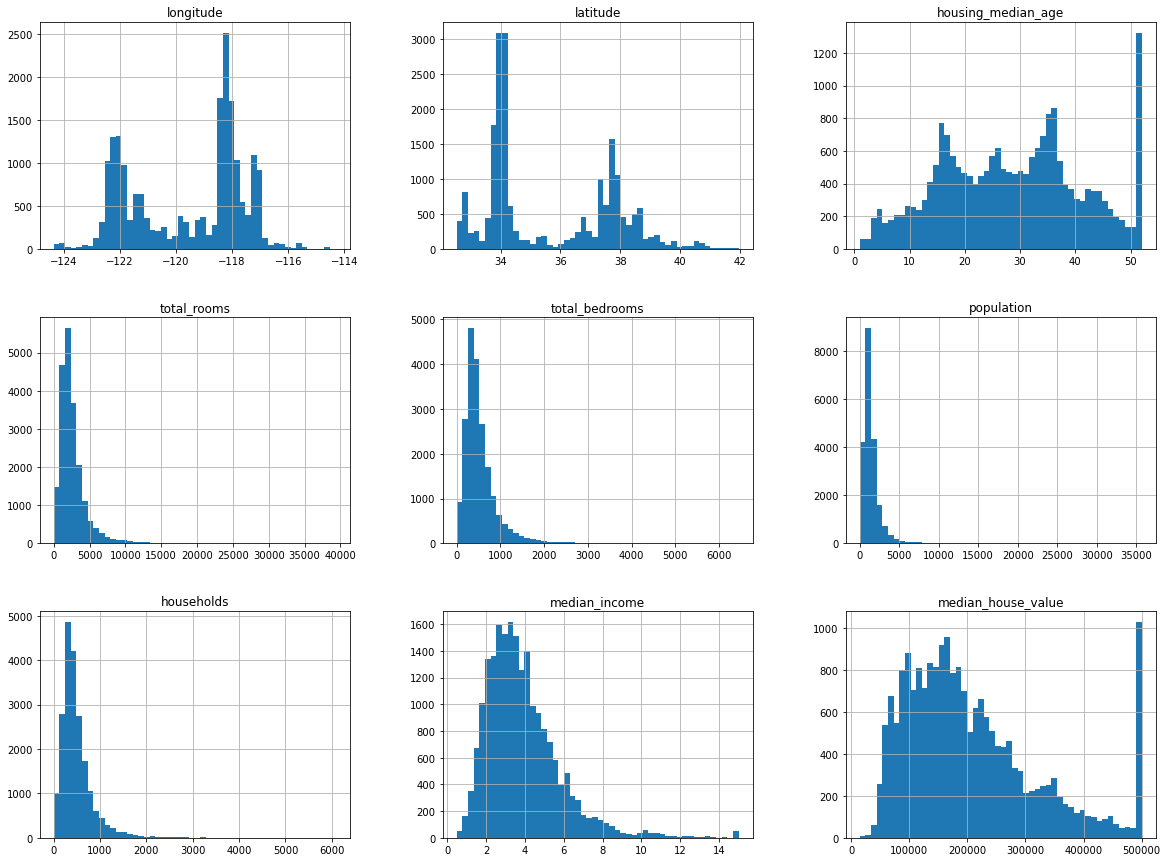

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # i did not realize that, like DF.DESCRIBE(), this will plot a histogram for every CONTINUOUS var
plt.show()

In [21]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [23]:
len(test_set)

4128

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

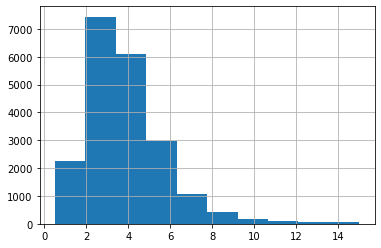

In [26]:
housing["median_income"].hist()

In [27]:
# creates "bins" for each median income type
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [28]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

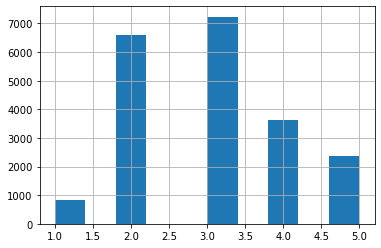

In [29]:
housing["income_cat"].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [32]:
# the porportion of the `strata` that we created is the same in the original data as it is in the test
# BUT NOT necessarily the same in the train data
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [33]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457849
1    0.159157
Name: income_cat, dtype: float64

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [36]:
# drop `income_cat` col from train and test sets
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
# create a copy to do EDA with
housing = strat_train_set.copy()

In [38]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
# HOW TO SAVE IMAGES (and create the folder if it does not exist)
# which is what we do... when a date does not exist
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure bad_visualization_plot


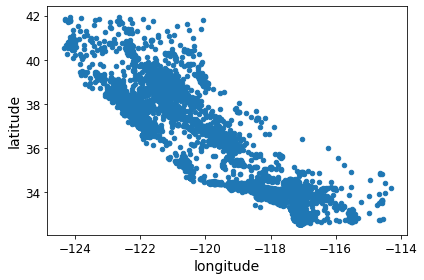

In [39]:
# using pandas to plot still
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

with latitude and longitude data we can make a map picture kind of well

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

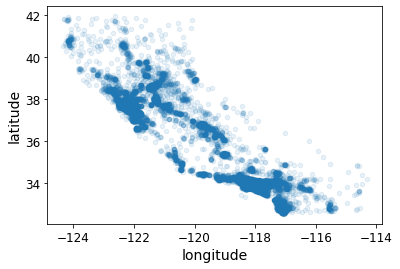

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

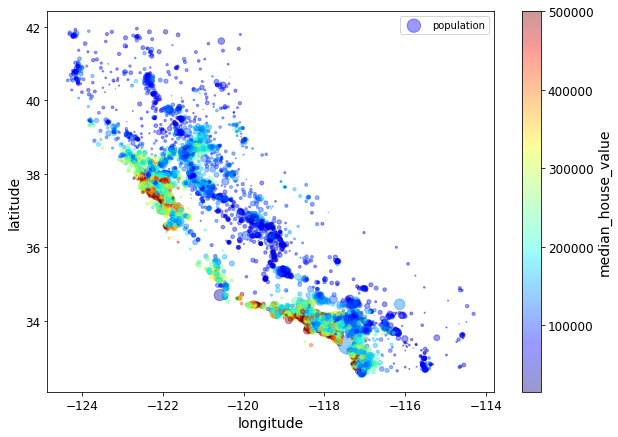

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# s controls the SIZE of the CIRCLES - we get variable sizes by relating them to a column in the dataframe... 
# "The marker size in points**2." from matplotlib.pyplot.scatter docs
# c we use a column, which is an array of floats to determine COLOR of the circles. We could have made it a single scalar color
# "array-like or list of colors or color"
# cmap is ONLY USED if c is an ARRAY of FLOATS

This map is nice because we know something about the size of the population, size of the circle in the scatterplot, and something about the price of the houses, the color of the circle. A red circle is expensive, a blue one is not. A large circle is more population, a smaller one is less population. This map is kind of informative, we can see that cities have more people AND are more expensive.

### Looking for correlation

In [42]:
corr_matrix = housing.corr()
type(corr_matrix)

pandas.core.frame.DataFrame

In [43]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

we actually dont really want too much correlation between variables if we are going to do a linear regression, because then we risk an issue of multicollinearity. 

Saving figure scatter_matrix_plot


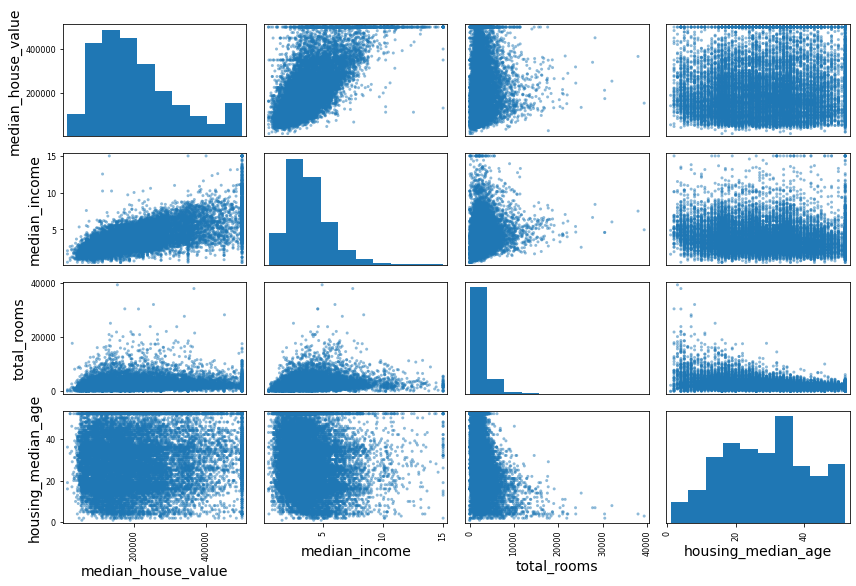

In [44]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

<AxesSubplot:>

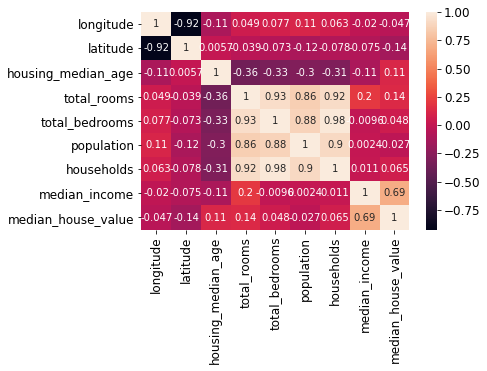

In [45]:
# why not use a heat map to see the relationship between all variables?
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

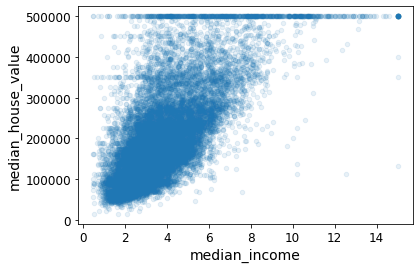

In [46]:
# median_income is the most correlated with median_house_value
# so lets just draw this scatter (which is row 0 col 1 in the scatter matrix)
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# we can clearly see the cap!

In [47]:
# creating new features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [48]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

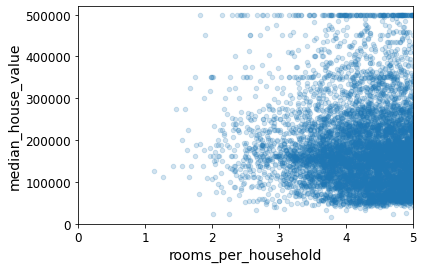

In [49]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [50]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [51]:
housing.info() # back to the original columns dropped the rooms_per_household, etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [52]:
# drop the row (each row corresponds to a district)
# housing.dropna(subset=["total_bedrooms"])    # option 1
# drop the entire column/feature from every district
# housing.drop("total_bedrooms", axis=1)       # option 2
# impute the value... fill the missing value with 0, or median, or mean
# if you choose median or mean, calculate the value FROM THE TRAINING DATA not the training AND test data
# median = housing["total_bedrooms"].median()  # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [53]:
# how to fill missing values using sklearn's Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [54]:
# we can only IMPUTE continuous numerical values, NOT categorical values
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])
# the second way is more general, it would work if you had multiple columns that contain categorical data

In [55]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [56]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [57]:
housing_num.median().values
# the imputer just has the median value for each column

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [58]:
X = imputer.transform(housing_num)
type(X)
# what exactly is X, what does imputer.transform do?

numpy.ndarray

In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [60]:
housing_tr.info()
# now total_rooms has 16512 values rather than the missing ones it had initially... what happens if the test set has a missing total
# room value?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [61]:
imputer.strategy

'median'

In [62]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) # using different index than before

In [63]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


The proper way to impute values to a TRAINING dataset

We want to create a pipeline, because when we have test data, we want to calculate these same features, so having a pipeline is necessary. Otherwise we would have to repeat the code.

In [64]:
# Categorical Encoding (Ordinal, Nominal, One-Hot are all types of encodings)
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [65]:
housing["ocean_proximity"].value_counts() # only 5 unique categories

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [66]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [67]:
# because the OrdinalEncoder is fit to the dataset, it now knows the possible category values
ordinal_encoder.categories_
# another note, ordinal data implies that order does matter. nominal does not.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [68]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [69]:
# sparse matrices have mostly zeros and some integers... must they always be one => NOPE.
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [70]:
# sparse_array.toarray() transforms the sparse matrix to a "dense" numpy array
housing_cat_1hot.toarray()
# five columns, one for each possible value of the categorical variable

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [71]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
# in sklearn, a transformer is simply an object that implements FIT() and TRANSFORM() functions
# much like in python how a context manger is an object that implements __enter__() and __exit__()
# passing in TransformerMixin as a Argument to the Class gives `fit_transform()` for free. or you
# could write your own method that saves time or space

# BaseEstimator gives two other methods, get_params() and set_params()
# Basically, we can feed in Parent Classes to our class to inherit some methods

In [73]:
# CUSTOM TRANSFORMER to combine elements that we did above
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# can we accomplish the same thing by using column names rather than their index value?

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms = True):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self # must we pass in X, y because those are the default arguments of fit?
    def transform(self, X, y=None): # X is the dataframe... I believe
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        # rooms_per_household = X.loc[:, "total_rooms"] / X.loc[:, "households"]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        # population_per_household = X.loc[:, "population"] / X.loc[:, "households"]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # bedrooms_per_room = X.loc[:, "total_bedrooms"] / X.loc[:, "total_rooms"]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household] 
    # fit_transform() comes from TransofmerMixin
    # get_param() comes from BaseEstimator
    # set_param() comes from BaseEstimator
    
# WE MUST USE COLUMN INDEX VALUES AND NOT NAMES BECAUSE THEY GET TRANSFORMED INTO A NP ARRAY
# we are working with numpy arrays and not dataframes...

CombinedAttributesAdder has one hyperparameter - that is we can create an extra column or not by passing in a boolean, which is nice. We can could keep extending this "feature adder" to have
booleans for other variables if we want to test many combinations

# Feature Scaling

We can scale features in two ways - *normailze* (min-max scaling) which squashes each number to between the range of 0 and 1, or *standardization* which creates mean 0 and standard deviation 1 for a feature, so they are on the same scale in two different ways. NEITHER TRANSFORMATION changes the actualy shape of the data, it just changes the scale. However, OUTLIERS will have more of an effect with normalization then it will for standardization. For example, one incorrect value that has an extra 0 would squash the normalized data between 0 and 0.1 and then have the max at 1 and NO VALUES between 0.1 and 1.

$$ \mathrm{Normalization} = \frac{x - min}{max - min} $$
$$ \mathrm{Standardization} = \frac{x - \hat{x}}{\sigma_x} $$

# Transformation Pipelines

We want to:
1. DEAL WITH MISSING DATA (either impute, remove the row, or remove the col)
2. transform categorical variables into something more useful (ordinal, nominal, or one hot encoding)
3. do feature extraction
4. add new features
5. scale the data
6. etc...

It is nice to be able to do all of these steps in the same order, especially so that when we do this for training data we can do the same for test data.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# we are putting all the steps that we have done individually into a pipeline that automates
# the entire process for us
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
# tr => train
housing_num_tr = num_pipeline.fit_transform(housing_num)

# the pipeline CALLS fit_transform() on every element of the list that we pass into its 
# init method. That is why we needed to add `fit` and `transform` to our custom transformer
# object CombinedAttributesAdder

The aboce `num_pipeline` is specifically for numerical data, not categorical. We want to create a pipleline that handles both the numerical and categorical data together, so we can feed in this pipeline that handles numerical and another pipeline thta handles categorical data.

In [75]:
from sklearn.compose import ColumnTransformer

# HOUSING_NUM refers to the NUMERICAL COLUMNS in our dataframe
num_attrs = list(housing_num)
# calling list(df) returns the COL/FEATURE NAMES of the dataframe
num_attrs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [76]:
cat_attrs = list(["ocean_proximity"]) # we could pass in housing_cat if there was more than one 

In [77]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs), # this could have been `cat_pipeline` if we had more...
])
# [name, transformer, columns] syntax for ColumnTransformer

# we pass in BOTH numerical AND categorical columns now
housing_prepared = full_pipeline.fit_transform(housing)

NOTE: the numberical pipeline will return dense numpy arrays but the onehotencoder will return sparse matrices. 

In [78]:
# pipelines can CONSUME a dataframe, but they RETURN a numpy array (or sparse scipy matrix)
type(housing_prepared)

numpy.ndarray

## Train a Model

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# lin_reg.fit(X, y)
# our X is the value we got from the pipelime, the y are the labels we were initially given

LinearRegression()

In [80]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [81]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [82]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

# Model Metrics

In [83]:
from sklearn.metrics import mean_squared_error

# doing this for the small sample from training, not the test set
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# syntax: mean_squared_error(y, y_hat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [84]:
# false because we want ROOT, so squaring would get back to mean_square_error
mean_squared_error(housing_labels, housing_predictions, squared=False)

68627.87390018745

In [85]:
# RMSE basically means "typical error for a prediction", so for a prediction on average we will
# be off by $68k, which when we look at the data is quite a lot!
housing_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [86]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse
# why did is so badly overfit the data?

0.0

# Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

# cross_val_score(model, input, labels, scoring metric, # cross validations)
# we pass in neg_mean_squared_error) because sklearn expects a UTILITY func, not a COST func
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def disp_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [90]:
disp_scores(tree_rmse_scores)

Scores: [73324.525058   71854.6923006  69217.74163758 70612.34383533
 68299.18860026 78049.7138141  70337.07358897 73634.96385083
 69650.43310633 71266.12159885]
Mean: 71624.67973908514
Standard Deviation: 2680.0353465455923


In [ ]:
# using cross validation to see how the linear model performs
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
disp_scores(np.sqrt(-lin_scores))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for_reg = RandomForestRegressor()
for_reg.fit(housing_prepared, housing_labels)
for_scores = cross_val_score(for_reg, housing_prepared, housing_labels, 
                             scoring='neg_mean_squared_error', cv=10)
disp_scores(np.sqrt(-for_scores))

In [ ]:
housing_predictions = for_reg.predict(housing_prepared)
for_train_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
for_train_rmse

In [ ]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = sv_reg.predict(housing_prepared)
mean_squared_error(housing_labels, housing_predictions, squared=False)

In [ ]:
def p_scores(model):
    model_scores = cross_val_score(for_reg, housing_prepared, 
                                   housing_labels, scoring='neg_mean_squared_error', cv=10)
    disp_scores(np.sqrt(-model_scores))

In [ ]:
p_scores(sv_reg)

In [ ]:
def p_rmse(model):
    model.fit(housing_prepared, housing_labels)
    housing_predictions = model.predict(housing_prepared)
    print(mean_squared_error(housing_labels, housing_predictions, squared=False))

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

In [ ]:
p_rmse(sgd)

In [ ]:
p_scores(sgd)

In [ ]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge()

In [ ]:
p_rmse(kr)

In [ ]:
p_scores(kr)

why do these models perform so poorly???

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [ ]:
p_rmse(gbr)

In [ ]:
p_scores(gbr)

In [ ]:
# I never specified the number of decision trees to use

# Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# you would need to define HYPERPARAMETERS for EACH of the models you are tuning
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# or is this ONLY for the random forest regressor?

# param_grid first tells sklearn to try 3x4 combinations of the first dict
# then tells sklearn to do 2x3 combinations of the second with bootstrap always set to False

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

# we go through the training set 90 TIMES

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvrs

In [ ]:
cvrs = grid_search.cv_results_
for mean_score, params in zip(cvrs["mean_test_score"], cvrs["params"]):
    print(np.sqrt(-mean_score), params)

The RMSE score for this combination is 49,682, which is slightly better than the score you got earlier using the default hyperparameter values (which was 50,182). Congratulations, you have successfully fine-tuned your best model!

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# RANDOM search not GRID search to find best hyperparameters

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attrs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attrs = list(cat_encoder.categories_[0])
attrs = num_attrs + extra_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attrs), reverse=True)

# Evaluating the Model (test set)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
# creating a confidence interval of the out of sample error... how is this done? dont you have to sample more than once?
# does it just boostrap from the test set?
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
# this is how the confidence interval is calculated
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1) # what is t.ppf? t-statistic?
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

In [ ]:
# using z-scores instead of t-scores to predict the interval... BOOSTRAPPING IS NOT used
zscore = stats.norm.ppf((1 + confidence) / 2) # point probability function?
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Exercises

In [ ]:
from sklearn.svm import SVR

# use a Support Vector Machine Regressor (look into using different kernels)

# create a NEW pipeline that removes USELESS features
# have the pipeline make prediction (i.e. pipeline.predict(X) should be able to be called)
# I think this means that we put the model in the pipeline... but how do we crossvalidate then?
# how do we tune hyperparameters?

# use RandomizedSearchCV to tune hyperparameters INSTEAD of GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
sv_lin_reg = SVR(kernel='linear', C=2.0)
sv_lin_reg.fit(housing_prepared, housing_labels)

sv_sig_reg = SVR(kernel='sigmoid', gamma='auto')
sv_sig_reg.fit(housing_prepared, housing_labels)

In [ ]:
def p_both(model):
    p_rmse(model) # training error
    p_scores(model) # cross validation error

In [ ]:
p_both(sv_lin_reg)

In [ ]:
p_both(sv_sig_reg)

In [ ]:
# creating a pipeline that ALSO does prediction... you just the pipeline that process the data AND THEN ADD A MODEL to it
process_and_predict_pipe = Pipeline([
    ('preparation', full_pipeline), # the full data processing pipeline... 'full_pipeline' : full_pipeline
    ('model', LinearRegression()), # the model... 'linear' : LinearRegression()
])
# COMMAS not COLONS
process_and_predict_pipe.fit(housing, housing_labels) #pipeline.fit(X,y)
process_and_predict_pipe.predict(some_data) #pipeline.predict(X)
# I think there was something on the pipeline will be able to use whatever methods its last element in the list passed into its __init__ has... in this
# case it can call anything that LinearRegresssion has...

In [ ]:
# TUNING HYPERPARAMETERS IMPLICITLY MEANS USING (CROSS) VALIDATION - GridSearchCV and RandomSearchCV... the CV stands for CrossValidation...

from sklearn.model_selection import GridSearchCV

# you would need to define HYPERPARAMETERS for EACH of the models you are tuning
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# or is this ONLY for the random forest regressor?

# param_grid first tells sklearn to try 3x4 combinations of the first dict
# then tells sklearn to do 2x3 combinations of the second with bootstrap always set to False

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=2, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

# we go through the training set 90 TIMES

# USING RandomSearchCV to compare the difference...

# sill have a param grid I believe...
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

# SEARCHCV searches through the parameters that you PASS INTO THE MODEL...
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
rnd_search.best_params_

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# THIS DOES ALL OF THE WORK... IT SELECTS THE MOST IMPORTANT FEATURES...
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
                       
                       
# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_rooms = True):
#         self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
#     def fit(self, X, y=None):
#         return self # must we pass in X, y because those are the default arguments of fit?
#     def transform(self, X, y=None): # X is the dataframe... I believe
#         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         # rooms_per_household = X.loc[:, "total_rooms"] / X.loc[:, "households"]
#         population_per_household = X[:, population_ix] / X[:, households_ix]
#         # population_per_household = X.loc[:, "population"] / X.loc[:, "households"]
#         if self.add_bedrooms_per_rooms:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             # bedrooms_per_room = X.loc[:, "total_bedrooms"] / X.loc[:, "total_rooms"]
#             return np.c_[X, rooms_per_household,
#                          population_per_household,
#                          bedrooms_per_room]
#         return np.c_[X, rooms_per_household, population_per_household] 
    # fit_transform() comes from TransofmerMixin
    # get_param() comes from BaseEstimator
    # set_param() comes from BaseEstimator
    
# WE MUST USE COLUMN INDEX VALUES AND NOT NAMES BECAUSE THEY GET TRANSFORMED INTO A NP ARRAY
# we are working with numpy arrays and not dataframes...

In [ ]:
# define number of features to keep
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
# this is how easy it is to add a new data processing component to a pipeline...
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
# PASSING IN A HyperParameter Tuning result INTO a model INTO a pipeline that does prediction:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])
# **rnd_search.best_params_ we have access to this AFTER running rnd_search = 
# RandomSearchCV.fit(model, params_to_tune, cv=#cvs, n_iter=n, scoring='neg_mean_squared_error')
# THEN YOU CALL rnd_search.fit(X, y)... it is when you fit the search that you pass in the actual data.